In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from numpy.linalg import norm
from numpy import dot

# These function retures the Functional Connectivity Network (FCN) inspired by inducing 
# the action potential presented in equation A.6 in the paper.
# This version is fast and suitble for high performace computing

def S_AB_excitatory(A_index,B_index,tau):
    
    if len(A_index)*len(B_index)==0:
        S_AB=0
    else:
        T=max(A_index[-1],B_index[-1])+1 # length of vector
        N_AB=max(len(A_index),len(B_index)) # number of spike

        f_A=[]
        A_last=-1000
        t=0
        for i in range(T):
            if t<len(A_index) and A_index[t]==i:
                A_last=A_index[t]
                t+=1
            f_A.append(np.exp((A_last-i)/tau)) 

        f_A_ave=np.sum(f_A)/T  
        F_AB=[]
        for i in B_index:
            F_AB.append((f_A[i]-f_A_ave)/(1-f_A_ave)/N_AB)    
        F_AB=sum(F_AB)

        plt.plot(f_A)
        S_AB=max(F_AB,0)
    return S_AB

def S_AB_inhibitory(A_index,B_index,tau):
    
    T=max(A_index[-1],B_index[-1])+1 # length of vector
    N_AB=max(len(A_index),len(B_index)) # number of spike
    
    f_A=[]
    A_last=-1000
    t=0
    for i in range(T):
        if t<len(A_index) and A_index[t]==i:
            A_last=A_index[t]
            t+=1
        f_A.append(1-np.exp((A_last-i)/tau)) 

    f_A_ave=np.sum(f_A)/T  
    F_AB=[]
    for i in B_index:
        F_AB.append((f_A[i]-f_A_ave)/(1-f_A_ave)/N_AB)    
    F_AB=sum(F_AB)

    plt.plot(f_A)
    S_AB=max(F_AB,0)
    return S_AB


[9, 19, 29, 39, 49] [10, 20, 30, 40, 50]


0.25554739709509555

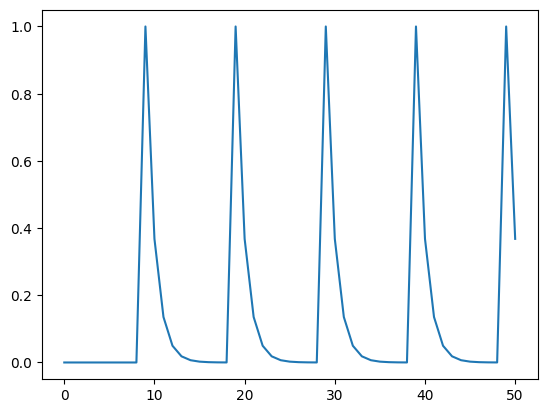

In [6]:
B_index=[10,20,30,40,50]
A_index=[9,19,29,39,49]
# A_index=[10,20,30,40,50]


print(A_index,B_index)
S_AB_excitatory(A_index,B_index,1)

[0, 10, 20, 30, 40] [9, 19, 29, 39, 49]


0.9992198658387221

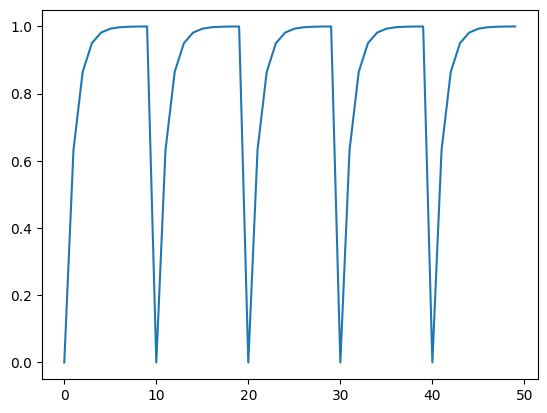

In [3]:
B_index=[9,19,29,39,49]
A_index=[0,10,20,30,40]
print(A_index,B_index)
S_AB_inhibitory(A_index,B_index,1)